In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [28]:
def load_data(filename : str):
    df = pd.read_csv(filename)
    episodes_before_eval = 500
    # retrieve the column of reward from the dataframe
    # is starts with "distance_based_reward_positive_" and end with "_step"
    #print(df.head())
    reward_column = [col for col in df.columns if col.startswith("distance_based_reward_positive_") and col.endswith("_step")]
    #print(reward_columns)
    episode_column = [col for col in df.columns if col.endswith("episode_reward")]
    print(episode_column)

    
    #df["eval_steps"] = df.episode_count * episodes_before_eval
    df["reward"] = df[reward_column]
    df["episode_reward"] = df[episode_column]

    # filter out the other columns
    df = df[["episode_count", "reward", "episode_reward"]]
    return df

df = load_data('../data/wandb_data/wandb_export_2024-08-06T15_28_57.233+02_00.csv')

['distance_based_reward_positive_2024-08-03-09-52 - episode_reward']


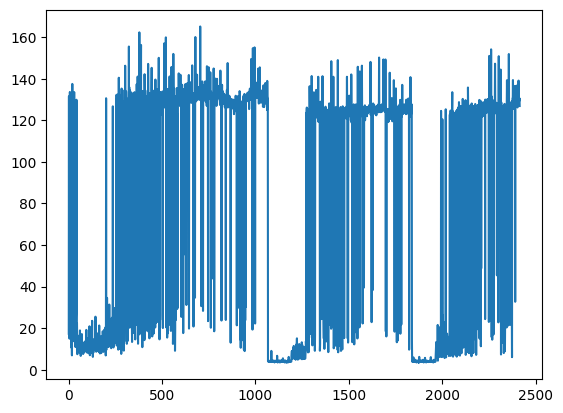

In [31]:
# plot df with episode_count on x-axis and reward on y-axis

plt.plot(df["episode_count"], df["episode_reward"])

In [37]:
import wandb
import os
import pandas as pd 
import matplotlib.pyplot as plt


# Initialize a W&B API instance
api = wandb.Api()

# Define the project and entity (entity is your username or team name)
entity = 'spigeleerloic'
project = 'donkey_training_checkpoint_5'

# Path to save the figures
save_dir = '../plots/wandb/'
os.makedirs(save_dir, exist_ok=True)

# Function to download figures from a run
def get_dataframe_from_run(run):
    # Access the run's summary
    scanned_history = run.scan_history()
    # iterate over the history
    for row_history in scanned_history:
        # if "episode_reward" is not None
        if row_history["episode_reward"] is not None:
            print(row_history["episode_reward"], row_history["episode_length"], row_history["episode_count"])



    # for key, value in df.items():
    #     print(key, value)
    # filtered_df = df[["episode_length", "episode_count", "episode_reward"]]
    # #print(filtered_df.head())
    # return filtered_df

def create_length_plot(df : pd.DataFrame, tag : str):
    plt.plot(df["episode_count"], df["episode_length"])
    plt.xlabel("Episode count")
    plt.ylabel("Episode length")
    plt.title(f"Evolution of the episode length during training")
    plt.savefig(f"../plots/wandb/{tag}_LENGTH.png")
    plt.close()

def create_episode_reward_plot(df : pd.DataFrame, tag : str):
    plt.plot(df["episode_count"], df["episode_reward"])
    plt.xlabel("Episode count")
    plt.ylabel("Episode reward")
    plt.title(f"Evolution of the episode reward during training")
    plt.savefig(f"../plots/wandb/{tag}_REWARD.png")
    plt.close()
# Retrieve all runs from the project
runs = api.runs(f"{entity}/{project}")

# Loop through the runs and download the figures
for run in runs:
    tag = run.tags
    if len(tag) > 0:
        tag = tag[0].split(" ")
        created_tag = ""
        for i in range(len(tag)):
            if tag[i] == "-" or tag[i] == "_":
                continue
            created_tag += tag[i]
            if i != len(tag) - 1:
                created_tag += "_"
        if created_tag == "FAILED":
            continue
        print(f"Downloading figures for run {run.name} with tag {created_tag}")
        df = get_dataframe_from_run(run)
        create_length_plot(df, created_tag)
        create_episode_reward_plot(df, created_tag)
        break
print("Figures downloaded successfully.")


20.078333154320717 None 0
136.39833322167397 None 1
32.84833315014839 None 2
27.024999782443047 None 3
17.83166667819023 None 4
132.91000007092953 None 5
20.581666484475136 None 6
26.623333275318146 None 7
20.839999854564667 None 8
45.251666501164436 None 9
17.741666585206985 None 10
27.806666553020477 None 11
13.158333212137222 None 12
13.374999947845936 None 13
14.834999948740005 None 14
12.458333276212215 None 15
12.876666620373726 None 16
15.430000007152557 None 17
28.35666647553444 None 18
28.47000004351139 None 19
13.063333220779896 None 20
22.6933331489563 None 21
14.763333290815353 None 22
17.93833327293396 None 23
19.476666674017906 None 24
129.9816666096449 None 25
18.396666660904884 None 26
20.20166666805744 None 27
136.6299998164177 None 28
11.969999946653843 None 29
17.47833324968815 None 30
36.70499972999096 None 31
27.51833325624466 None 32
26.948333233594894 None 33
16.686666637659073 None 34
17.05333337187767 None 35
130.47166652977467 None 36
19.45666639506817 None 37

KeyboardInterrupt: 